<a href="https://colab.research.google.com/github/Shohjahon02/first_my_git/blob/main/Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
df.drop('BloodPressure', axis=1, inplace=True)

In [3]:
df.shape

(768, 8)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 766
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               568 non-null    int64  
 1   Glucose                   568 non-null    int64  
 2   SkinThickness             568 non-null    int64  
 3   Insulin                   568 non-null    int64  
 4   BMI                       568 non-null    float64
 5   DiabetesPedigreeFunction  568 non-null    float64
 6   Age                       568 non-null    int64  
 7   Outcome                   568 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 39.9 KB


In [72]:
df.describe()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,4.054577,125.040493,20.677817,82.709507,32.624296,0.493671,34.103873,0.471831
std,3.450151,33.240985,16.353030,120.073780,7.924741,0.346797,11.769304,0.499646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,102.000000,0.000000,0.000000,27.775000,0.247000,25.000000,0.000000
50%,3.000000,121.500000,23.000000,7.000000,32.600000,0.392000,30.000000,0.000000
75%,6.000000,146.000000,33.000000,132.000000,37.500000,0.662000,41.250000,1.000000
max,17.000000,199.000000,99.000000,846.000000,67.100000,2.420000,72.000000,1.000000


In [40]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [39]:
idx = df[df['Outcome']==0].sample(200).index

In [41]:
df.drop(idx, axis=0, inplace=True)
df['Outcome'].value_counts()

0    300
1    268
Name: Outcome, dtype: int64

In [42]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128635,0.089559,0.055583,0.010453,0.032950,0.513552,0.222394
Glucose,0.128635,1.000000,0.055579,0.316340,0.211316,0.128812,0.272278,0.461514
SkinThickness,0.089559,0.055579,1.000000,0.460950,0.367119,0.206504,0.140753,0.085984
Insulin,0.055583,0.316340,0.460950,1.000000,0.166503,0.172795,0.024870,0.138868
BMI,0.010453,0.211316,0.367119,0.166503,1.000000,0.166126,0.011205,0.300609
DiabetesPedigreeFunction,0.032950,0.128812,0.206504,0.172795,0.166126,1.000000,0.011138,0.155019
Age,0.513552,0.272278,0.140753,0.024870,0.011205,0.011138,1.000000,0.238184
Outcome,0.222394,0.461514,0.085984,0.138868,0.300609,0.155019,0.238184,1.000000


In [43]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.461514
BMI                         0.300609
Age                         0.238184
Pregnancies                 0.222394
DiabetesPedigreeFunction    0.155019
Insulin                     0.138868
SkinThickness               0.085984
dtype: float64

In [44]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [75]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_predict = knn.predict(X_test)

In [77]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.6212121212121212

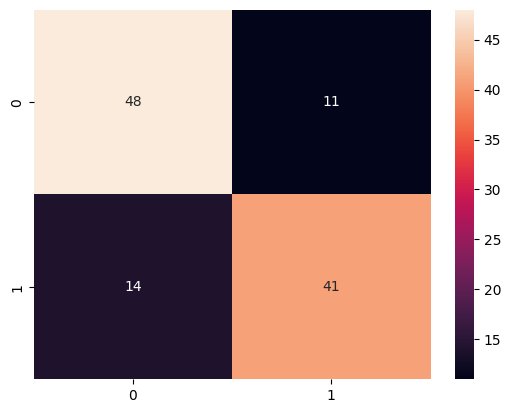

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [79]:
confusion_matrix(y_test, y_predict)

array([[48, 11],
       [14, 41]])

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.7884615384615384
recall=0.7454545454545455
f1=0.766355140186916
accuracy=0.7807017543859649


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        59
           1       0.79      0.75      0.77        55

    accuracy                           0.78       114
   macro avg       0.78      0.78      0.78       114
weighted avg       0.78      0.78      0.78       114



In [62]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       300
           1       0.70      0.65      0.68       268

    accuracy                           0.70       568
   macro avg       0.70      0.70      0.70       568
weighted avg       0.70      0.70      0.70       568



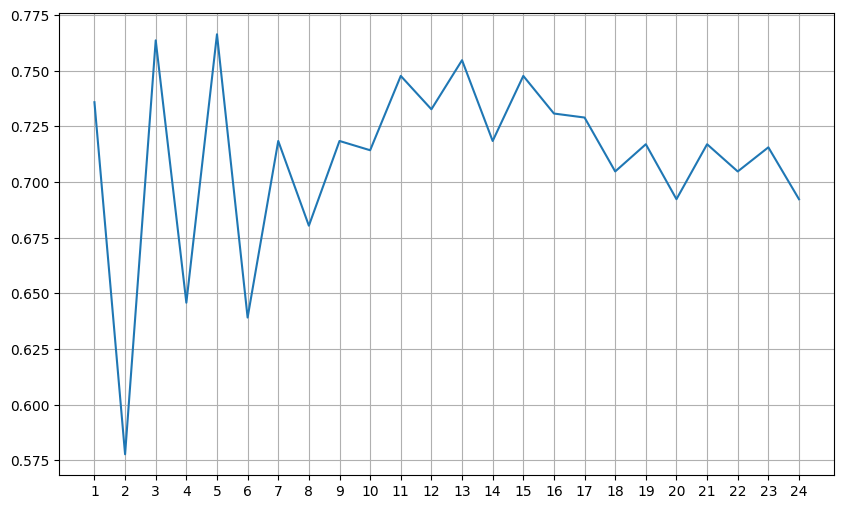

In [63]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [65]:
knn_gscv.cv_results_['rank_test_score']

array([23, 24, 18, 22, 13, 21, 19, 16, 20, 15, 17, 12, 14,  8, 11,  5,  1,
        2,  7,  4, 10,  3,  9,  6], dtype=int32)

In [66]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [67]:
knn_gscv.best_score_

0.723691973296072

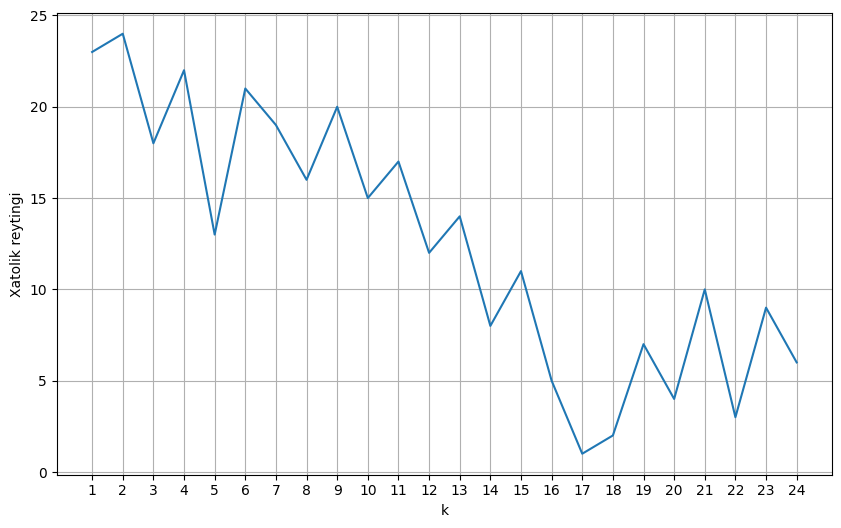

In [68]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [ ]:
# modelni aniqligini oshirish
# kodlarni tartiblash
# modelni saqlash (github, gitlab)
# dokumentlarni ko'rib chiqish

In [81]:
import joblib

filename = 'diabet.jbl' # faylga istalgan nom beramiz
joblib.dump(knn, filename)

['diabet.jbl']

In [82]:
model = joblib.load(filename)

In [83]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = model, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       300
           1       0.70      0.65      0.68       268

    accuracy                           0.70       568
   macro avg       0.70      0.70      0.70       568
weighted avg       0.70      0.70      0.70       568



In [85]:
df.to_csv('diabet_data.csv')